In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
obs_df = pd.read_csv("figure_s4_obs_scores.txt", sep=" ")
p_vals = pd.read_csv("figure_s4_obs_p_vals.txt", sep=" ")

In [3]:
obs_df.columns = np.arange(-0.25,0.275,0.025)
p_vals.columns = np.arange(-0.25,0.275,0.025)
obs = pd.melt(obs_df.reset_index(), id_vars='index')
ps = pd.melt(p_vals)["value"]
merged_df = obs.assign(p_value = ps)
filt_dfs = []
merged_df.loc[merged_df["p_value"] >= 0.05,"value"] = np.nan
for name, group in merged_df.groupby("index"):
    if(pd.isnull(group["value"]).all()):
        pass
    else:
        filt_dfs.append(group)
df = pd.concat(filt_dfs)
df['index'] = df['index'].map(lambda x: x.lstrip("KEGG").replace("_", " ").lstrip())
df = df.pivot(index='variable', columns='index', values='value')
df.index = np.round(np.arange(-0.25,0.275,0.025), 4)
df = df.rename(columns={"GLYCOSYLPHOSPHATIDYLINOSITOL GPI ANCHOR BIOSYNTHESIS": "G. GPI ANCHOR BIOSYNTHESIS"})
order = ["CELL CYCLE", "PROTEIN EXPORT", "PYRIMIDINE METABOLISM", "N GLYCAN BIOSYNTHESIS",
         "UBIQUITIN MEDIATED PROTEOLYSIS", "NUCLEOTIDE EXCISION REPAIR", "RNA DEGRADATION",
         "AMINOACYL TRNA BIOSYNTHESIS",
         "BLADDER CANCER", "G. GPI ANCHOR BIOSYNTHESIS",
        "MISMATCH REPAIR", "CALCIUM SIGNALING PATHWAY"]
df = df[order]
df

/home/km/.local/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


index,CELL CYCLE,PROTEIN EXPORT,PYRIMIDINE METABOLISM,N GLYCAN BIOSYNTHESIS,UBIQUITIN MEDIATED PROTEOLYSIS,NUCLEOTIDE EXCISION REPAIR,RNA DEGRADATION,AMINOACYL TRNA BIOSYNTHESIS,BLADDER CANCER,G. GPI ANCHOR BIOSYNTHESIS,MISMATCH REPAIR,CALCIUM SIGNALING PATHWAY
-0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620385,NaN,NaN,NaN,-0.444991
-0.225,NaN,NaN,NaN,NaN,NaN,NaN,0.493831,0.630540,NaN,NaN,NaN,NaN
-0.200,0.595097,NaN,NaN,NaN,NaN,NaN,0.500395,0.638517,0.506003,NaN,NaN,NaN
-0.175,0.598647,0.622806,0.443677,NaN,NaN,NaN,0.501494,0.640902,0.512617,NaN,NaN,NaN
-0.150,0.601478,0.626127,0.450724,NaN,NaN,NaN,NaN,0.638539,0.516984,NaN,NaN,NaN
-0.125,0.603710,0.626831,0.457017,NaN,NaN,NaN,NaN,0.632821,0.520045,NaN,NaN,NaN
-0.100,0.605119,0.627375,0.463040,0.543008,NaN,NaN,NaN,0.623128,0.522601,NaN,NaN,NaN
-0.075,0.605843,0.628893,0.468240,0.547480,NaN,NaN,NaN,0.610624,0.524206,NaN,NaN,NaN
-0.050,0.606271,0.630316,0.473245,0.551722,NaN,NaN,NaN,0.599180,0.525303,NaN,NaN,NaN
-0.025,0.606602,0.631653,0.479535,0.555750,NaN,NaN,NaN,0.588667,0.525915,NaN,NaN,NaN


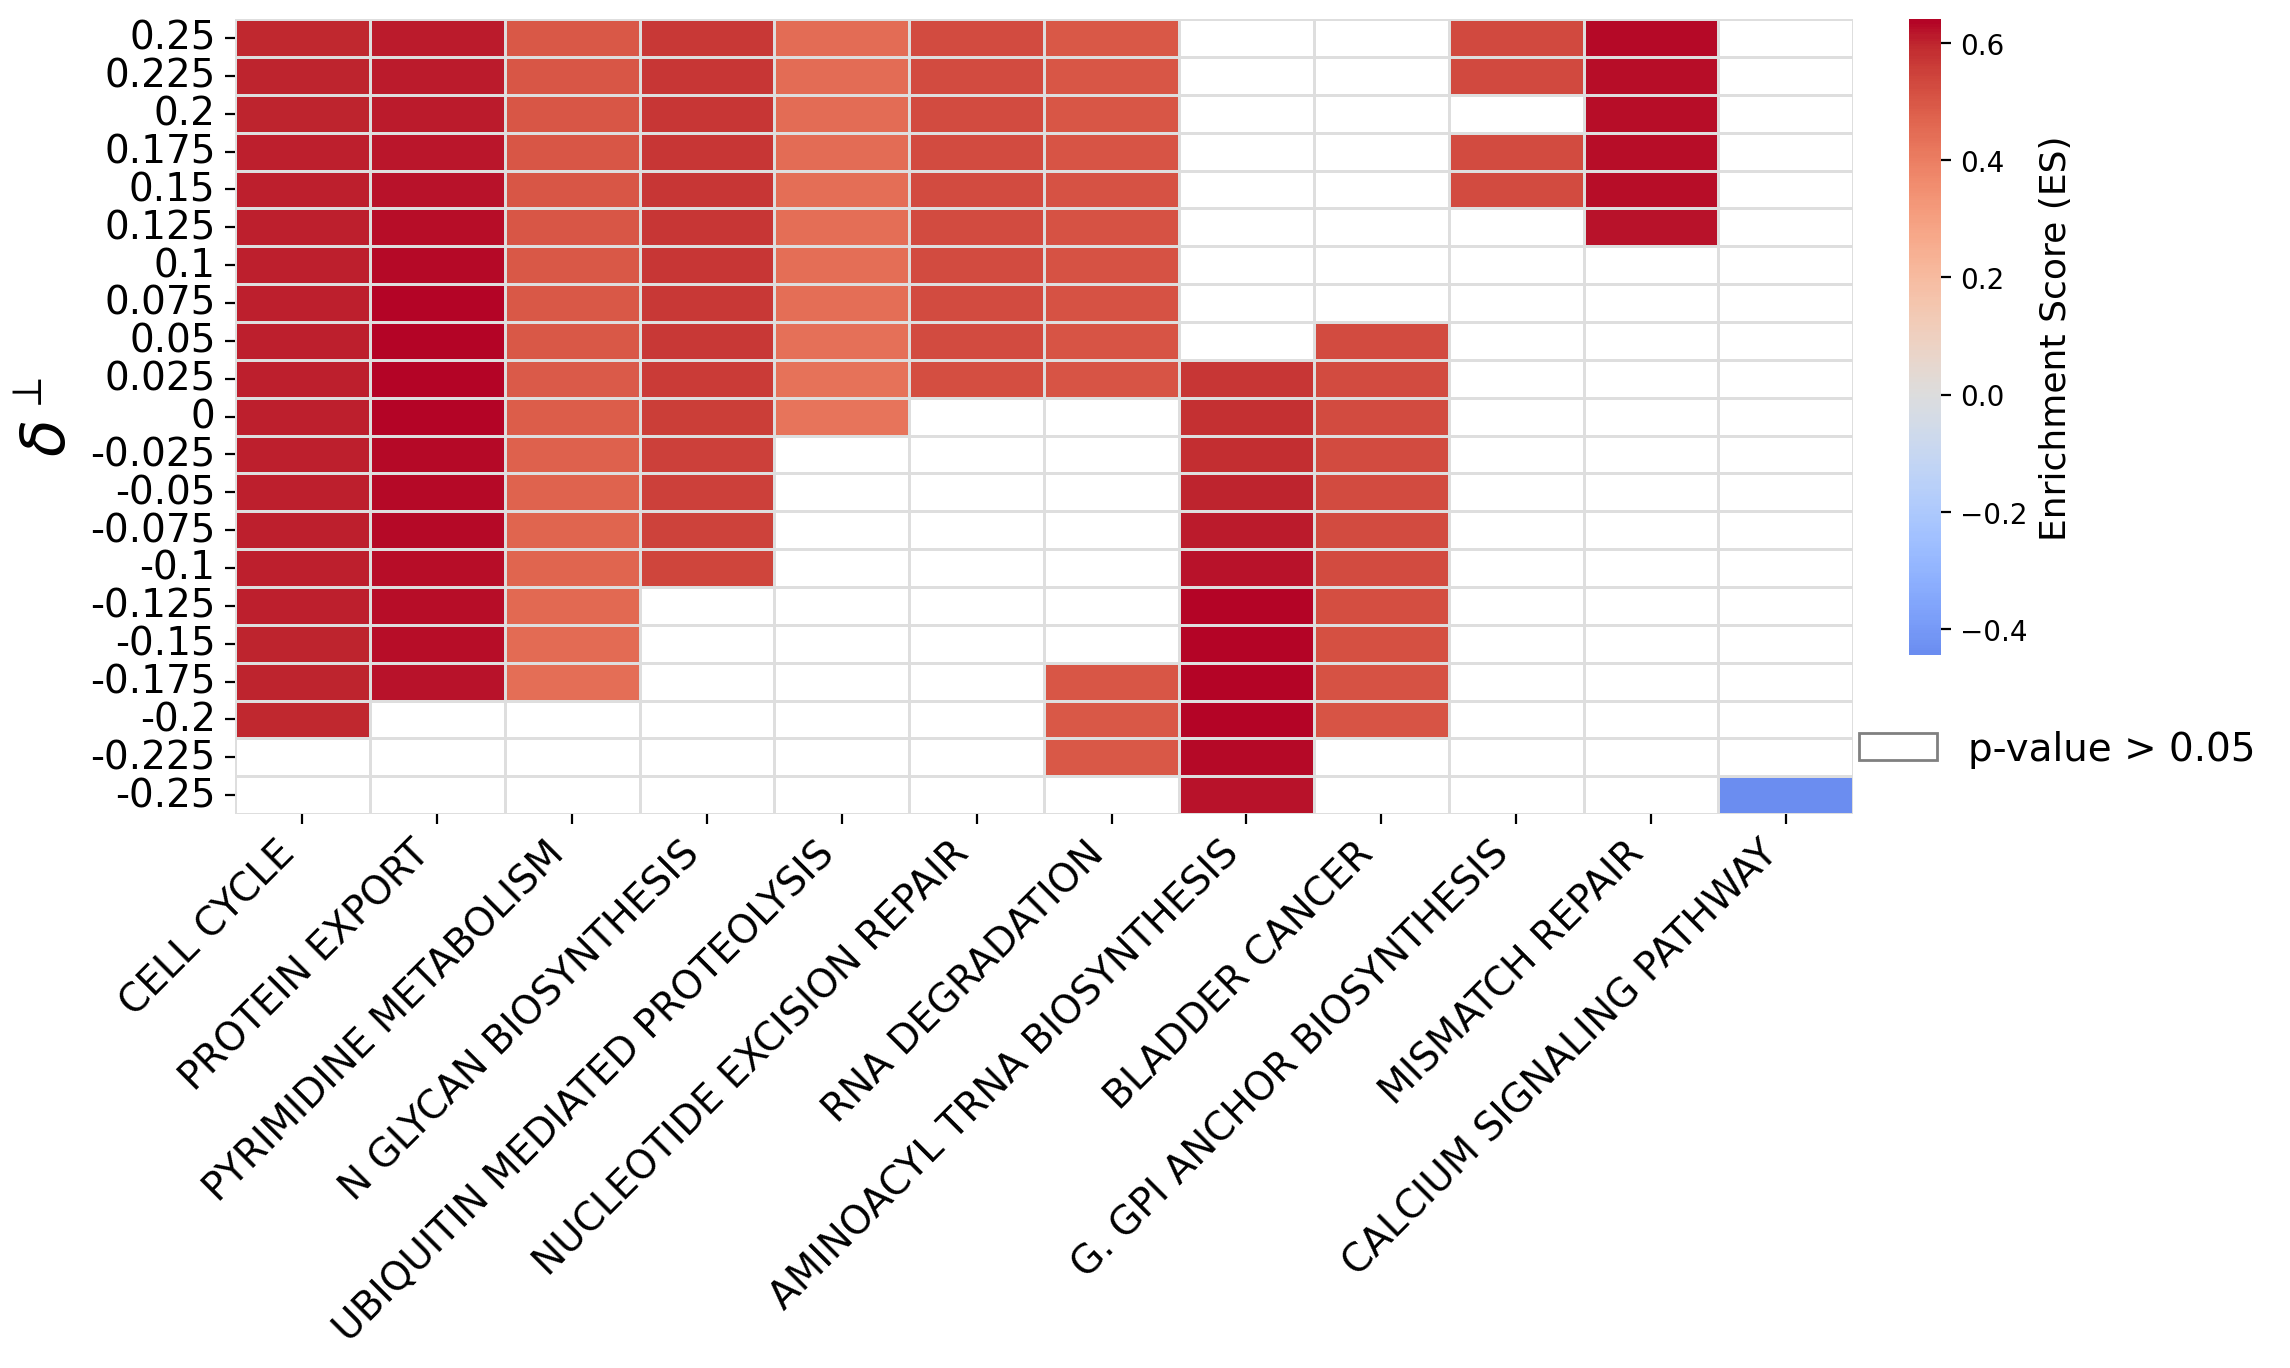

In [6]:
fig, ax = plt.subplots(figsize=(12, 7.5), dpi=200)

sns.heatmap(df, ax=ax, center=0, cmap="coolwarm", linewidths=0.5, linecolor="#dedede",
           cbar_kws={'label': 'Enrichment Score (ES)', "shrink": .8,
                     "fraction": 0.1, "pad": 0.03, "anchor": (0, 1)}) 
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
y_lab = ax.get_yticklabels()
y_lab[10] = plt.Text(0,10.5,'0')
ax.set_yticklabels(y_lab, fontsize=14)
ax.axes.get_xaxis().get_label().set_visible(False)
ax.set_ylabel("$δ^\perp$", fontdict={"size": 22})
ax.figure.axes[-1].yaxis.label.set_size(13)
ax.legend(handles=[Patch(facecolor='white', edgecolor='grey', label="p-value > 0.05")],
          bbox_to_anchor=(0.77, -0.35, 0.5, 0.5), prop={'size': 14}, frameon=False)
plt.subplots_adjust(bottom=0.35)
fig.savefig('/home/km/data/output/figure_s_bc_scale_sens.png', dpi=fig.dpi)

In [23]:
ax.get_yticklabels()[10] = plt.Text(0,10.5,'0')